# Visualização de Dados

### Titanic

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic/train.csv')

In [2]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
data.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 
                'IrmaosConjuge','PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [4]:
data['Sexo'].replace({'male': 'homem', 'female': 'mulher'}, inplace=True)

In [5]:
data['Cabine'] = data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

### Matplotlib

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [7]:
data['Idade'].isnull().sum()

177

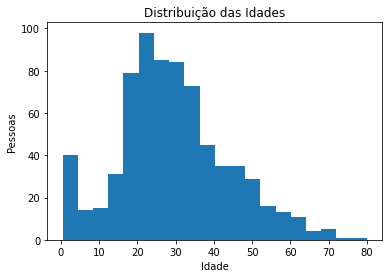

In [8]:
plt.hist(data['Idade'].dropna(), bins=20)
plt.title('Distribuição das Idades')
plt.ylabel('Pessoas')
plt.xlabel('Idade')
plt.show()

In [9]:
data['Classe'].unique()

array([3, 1, 2])

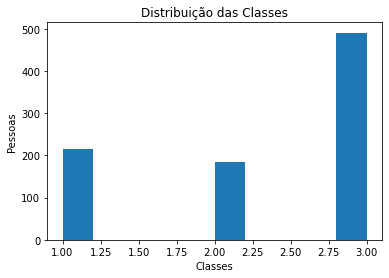

In [10]:
plt.hist(data['Classe'])
plt.title('Distribuição das Classes')
plt.ylabel('Pessoas')
plt.xlabel('Classes')
plt.show()

### Subplots - 1ª Forma

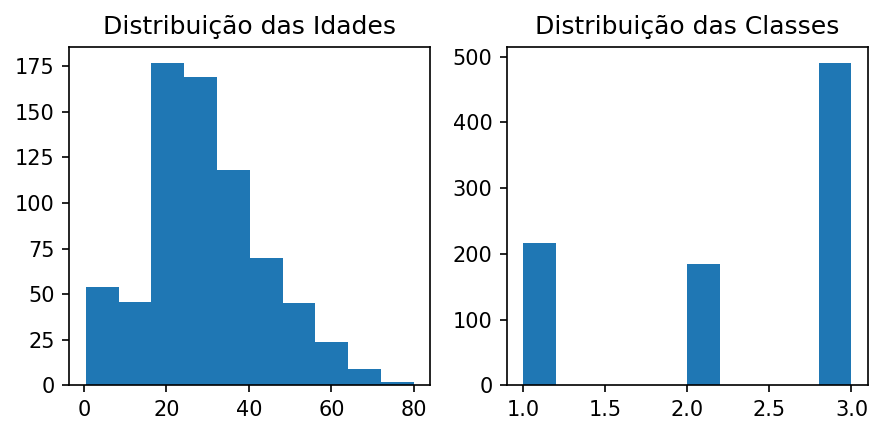

In [11]:
plt.figure(figsize=(6,3), dpi=150)
plt.subplot(1,2,1) # 1 linha, 2 colunas, plot 1
plt.hist(data['Idade'].dropna())
plt.title('Distribuição das Idades')

plt.subplot(1,2,2) # 1 linha, 2 colunas, plot 2
plt.hist(data['Classe'])
plt.title('Distribuição das Classes')

plt.tight_layout()
plt.show()

### Subplots - 2ª Forma

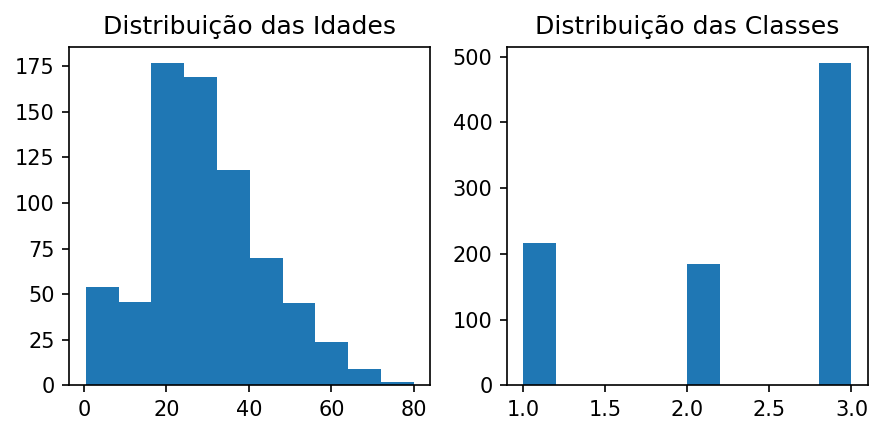

In [12]:
f, ax = plt.subplots(1,2, figsize=(6,3), dpi=150) # 1 linha, 2 colunas
ax[0].hist(data['Idade'].dropna())
ax[0].set_title('Distribuição das Idades')

ax[1].hist(data['Classe'])
ax[1].set_title('Distribuição das Classes')

plt.tight_layout()
plt.show()

### Seaborn

In [13]:
import seaborn as sns #outra biblioteca de visualização!!

In [14]:
data['Sobreviveu'].value_counts()

0    549
1    342
Name: Sobreviveu, dtype: int64

In [15]:
data['Sexo'].value_counts()

homem     577
mulher    314
Name: Sexo, dtype: int64

In [16]:
data['Classe'].value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

### pie e countplot

/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

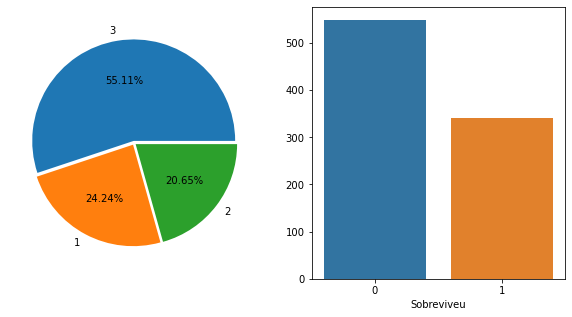

In [17]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Classe'].value_counts().plot.pie(ax=ax[0], explode=[0.02,0.02,0.02], autopct='%0.2f%%')
ax[0].set_ylabel('')

sns.countplot('Sobreviveu', data=data, ax=ax[1])
ax[1].set_ylabel('')


### countplot  e hue

/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sexo', ylabel='count'>

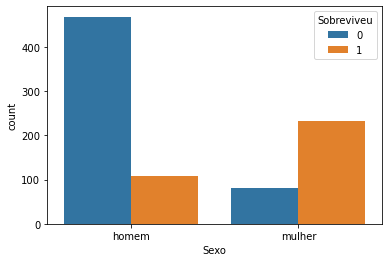

In [18]:
sns.countplot('Sexo', hue='Sobreviveu', data=data)

### boxplot

<AxesSubplot:xlabel='Classe', ylabel='Idade'>

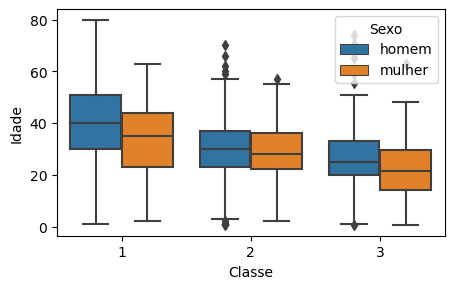

In [19]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe',y='Idade', hue='Sexo', data=data)

### violinplot

<AxesSubplot:xlabel='Classe', ylabel='Idade'>

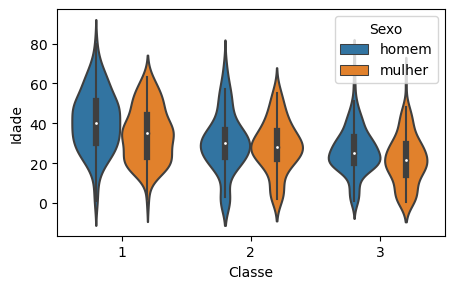

In [20]:
plt.figure(figsize=(5,3), dpi=100)
sns.violinplot(x='Classe',y='Idade', hue='Sexo', data=data)

### FacetGrid com hist

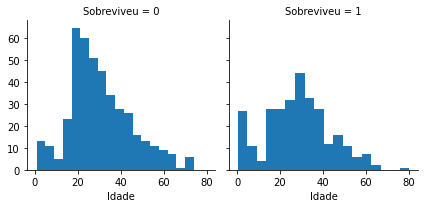

In [21]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

### FacetGrid com barplot

/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


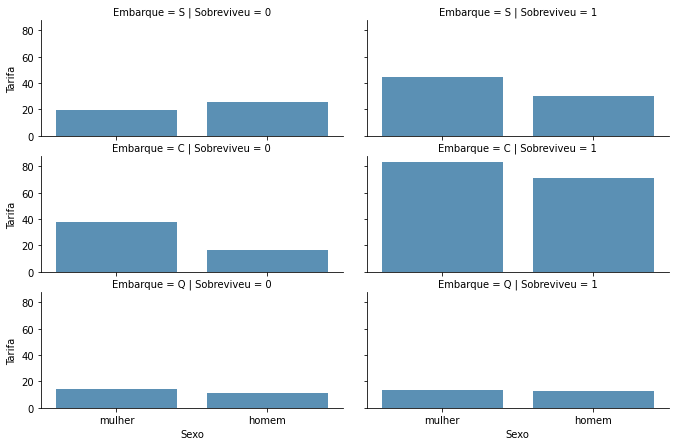

In [22]:
g = sns.FacetGrid(data, row='Embarque', col='Sobreviveu')
g.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.8, ci=None)

fig=plt.gcf()
fig.set_size_inches(10,6)

### FacetGrid com distplot

/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

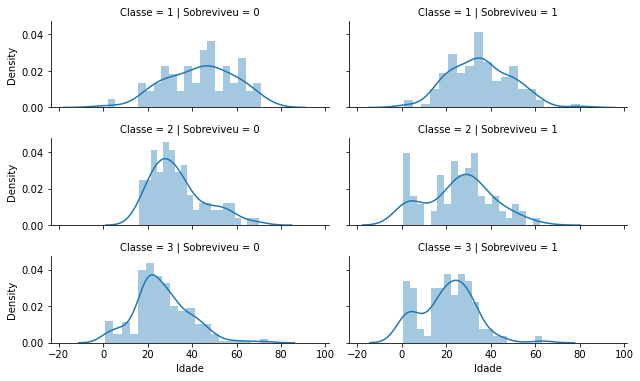

In [23]:
g = sns.FacetGrid(data, col='Sobreviveu', row='Classe', height=1.8, aspect=2.5)
g.map(sns.distplot, 'Idade', bins=20)

### catplot do tipo "point"

/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


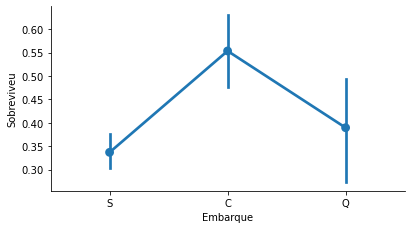

In [24]:
sns.catplot('Embarque', 'Sobreviveu', data=data, kind='point') #ci calcula o média/ o desvio padrão
fig=plt.gcf()
fig.set_size_inches(6,3)

In [25]:
data['Embarque'].value_counts()

S    644
C    168
Q     77
Name: Embarque, dtype: int64

### FacetGrid com pointplot

/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


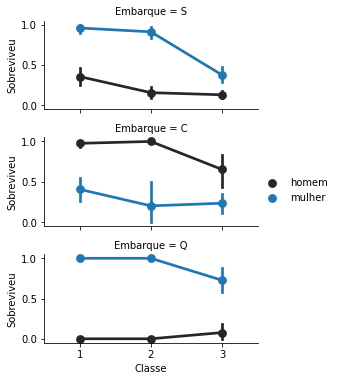

In [26]:
g = sns.FacetGrid(data, row='Embarque', height=1.8, aspect=2.2)
g.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo')
g.add_legend()

### heatmap

In [27]:
data.isnull().sum() #é um mapa de calor

IdPassageiro       0
Sobreviveu         0
Classe             0
Nome               0
Sexo               0
Idade            177
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Cabine           687
Embarque           2
dtype: int64

<AxesSubplot:>

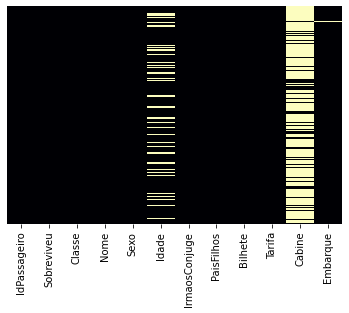

In [28]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

### relplot

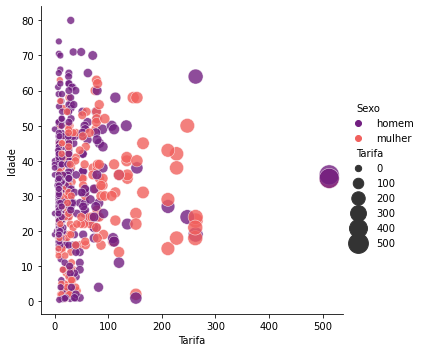

In [29]:
sns.relplot(x='Tarifa', y='Idade', hue='Sexo', data=data, size='Tarifa', sizes=(40,400),
           alpha=0.8, palette='magma')
plt.show()

### scatterplot

<AxesSubplot:xlabel='Idade', ylabel='Tarifa'>

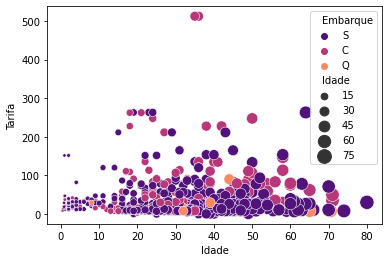

In [30]:
sns.scatterplot(x='Idade', y='Tarifa', hue='Embarque', size='Idade',
               palette='magma', data=data, sizes=(10, 200))

### pairplot

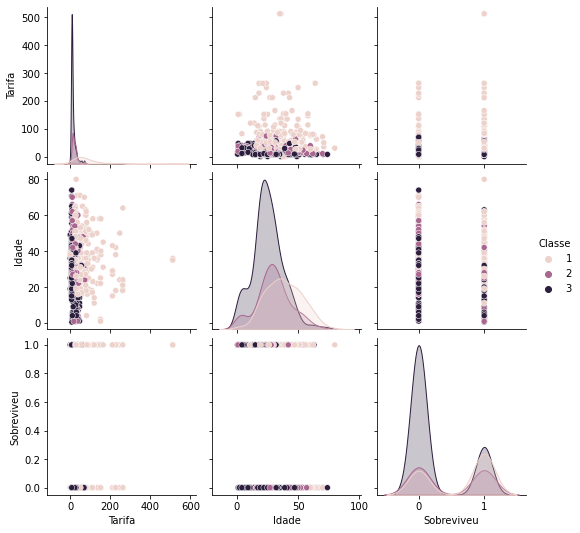

In [31]:
sns.pairplot(data[['Tarifa', 'Idade', 'Classe', 'Sexo', 'Embarque','Sobreviveu']], hue='Classe') #faz um resumo dos dados

### jointplot tipo "kde"

/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


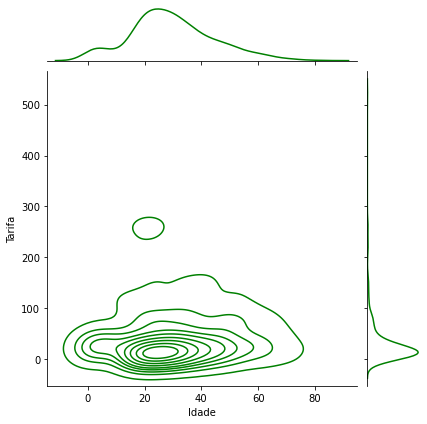

In [32]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='kde', color='g') # serve para saber onde os dados estão concentradados

### jointplot tipo "reg"

/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


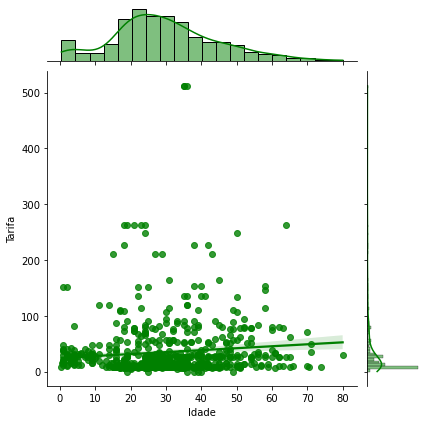

In [33]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='reg', color='g')

### kdeplot

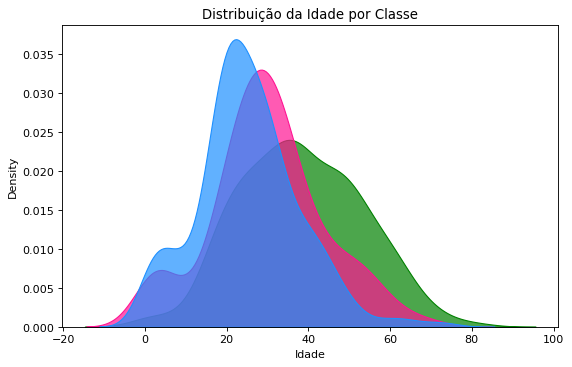

In [34]:
plt.figure(figsize=(8,5), dpi=80)
sns.kdeplot(data['Idade'].loc[data['Classe']==1], shade=True, 
            color='g', label='1ª Classe', alpha=0.7)
sns.kdeplot(data['Idade'].loc[data['Classe']==2], shade=True, 
            color='deeppink', label='2ª Classe', alpha=0.7)
sns.kdeplot(data['Idade'].loc[data['Classe']==3], shade=True, 
            color='dodgerblue', label='3ª Classe', alpha=0.7)
plt.title('Distribuição da Idade por Classe')
plt.show()

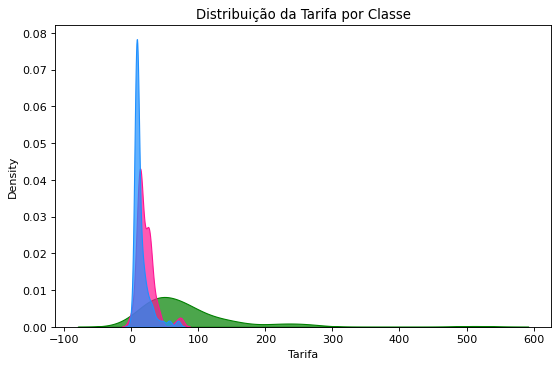

In [35]:
plt.figure(figsize=(8,5), dpi=80)
sns.kdeplot(data['Tarifa'].loc[data['Classe']==1], shade=True, 
            color='g', label='1ª Classe', alpha=0.7)
sns.kdeplot(data['Tarifa'].loc[data['Classe']==2], shade=True, 
            color='deeppink', label='2ª Classe', alpha=0.7)
sns.kdeplot(data['Tarifa'].loc[data['Classe']==3], shade=True, 
            color='dodgerblue', label='3ª Classe', alpha=0.7)
plt.title('Distribuição da Tarifa por Classe')
plt.show()

### catplot do tipo "count"

/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


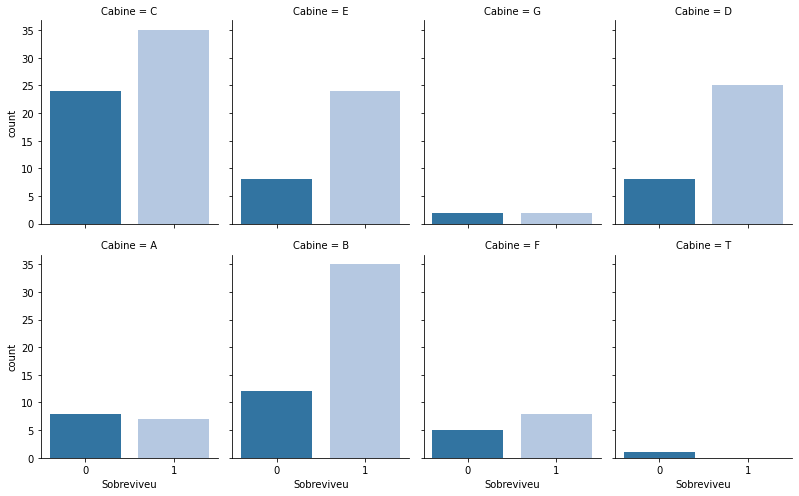

In [36]:
sns.catplot('Sobreviveu', col='Cabine', data=data[['Sobreviveu', 'Cabine']].dropna(),
           kind='count', height=3.5, aspect=0.8, col_wrap=4, palette='tab20')

plt.show()

### heatmap corr()

<AxesSubplot:>

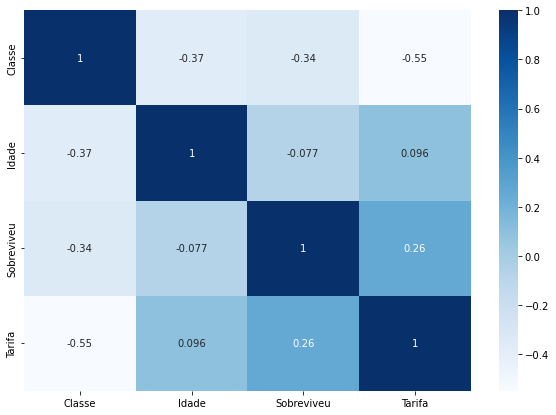

In [37]:
plt.figure(figsize=(10,7))

sns.heatmap(data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque']].corr(), 
            cmap='Blues', annot=True)

In [38]:
data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque']].corr()

,Classe,Idade,Sobreviveu,Tarifa
Classe,1.000000,-0.369226,-0.338481,-0.549500
Idade,-0.369226,1.000000,-0.077221,0.096067
Sobreviveu,-0.338481,-0.077221,1.000000,0.257307
Tarifa,-0.549500,0.096067,0.257307,1.000000


In [39]:
data = pd.get_dummies(data=data, columns=['Embarque'], drop_first=True)

In [40]:
data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque_Q','Embarque_S']].corr()

,Classe,Idade,Sobreviveu,Tarifa,Embarque_Q,Embarque_S
Classe,1.000000,-0.369226,-0.338481,-0.549500,0.221009,0.081720
Idade,-0.369226,1.000000,-0.077221,0.096067,-0.022405,-0.032523
Sobreviveu,-0.338481,-0.077221,1.000000,0.257307,0.003650,-0.155660
Tarifa,-0.549500,0.096067,0.257307,1.000000,-0.117216,-0.166603
Embarque_Q,0.221009,-0.022405,0.003650,-0.117216,1.000000,-0.496624
Embarque_S,0.081720,-0.032523,-0.155660,-0.166603,-0.496624,1.000000


<AxesSubplot:>

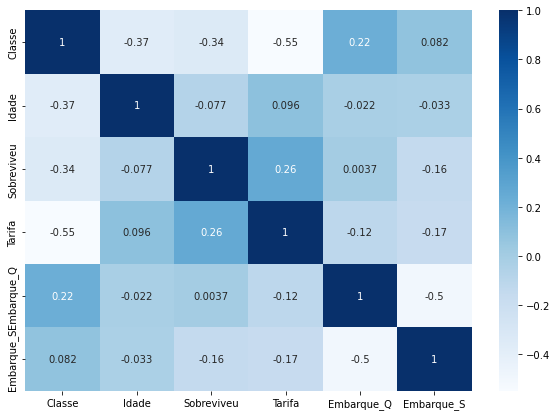

In [41]:
plt.figure(figsize=(10,7))

sns.heatmap(data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque_Q','Embarque_S']].corr(), 
            cmap='Blues', annot=True)

### plot

In [42]:
x = np.random.normal(10, 1, 15) # criando 15 elementos | com média 10 | e desvio padrão 1

In [43]:
len(x)

15

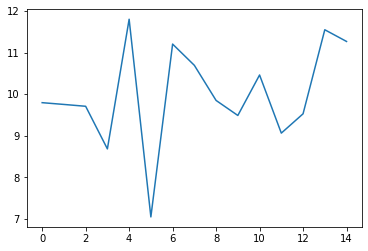

In [44]:
plt.plot(x)

### linspace

In [45]:
x = np.linspace(0,20, 1000) # criando 1000 numeros igualmente 
                            # espaçados num intervalo de 0 a 20

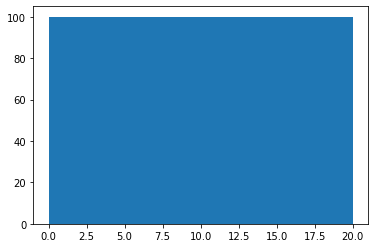

In [46]:
plt.hist(x)
plt.show()

In [47]:
y = 2*x - 5 # equação do primeiro grau

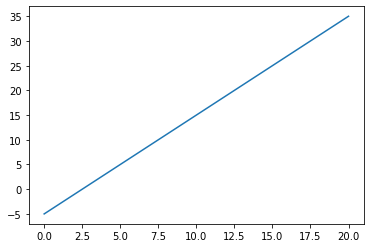

In [48]:
plt.plot(x,y)
plt.show()

In [49]:
y = 2*x**2 - 5*x +3 # equação do segundo grau

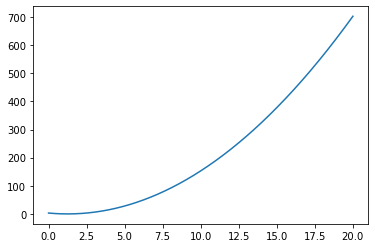

In [50]:
plt.plot(x,y)
plt.show()

In [51]:
y = 2*x**3 + 2*x**2 - 5*x +3 # equação do terceiro grau

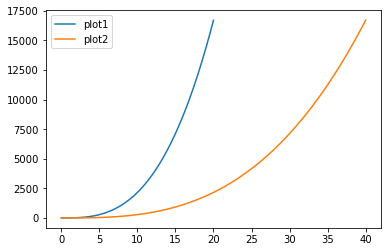

In [52]:
plt.plot(x,y, label='plot1')
plt.plot(x*2,y, label='plot2')

plt.legend()
plt.show()

### normal

In [53]:
y = np.random.normal(8,2,1000) # criando 1000 elementos normalmente distribuidos
                               # com uma média 8 | e um desvio padrão de 2

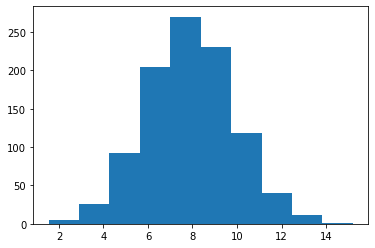

In [54]:
plt.hist(y)
plt.show()

/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


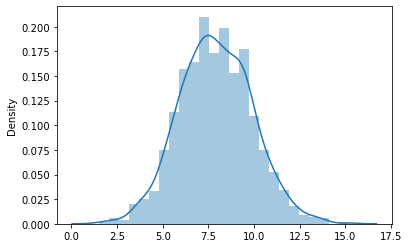

In [55]:
sns.distplot(y)
plt.show()

Fontes:
* https://matplotlib.org/gallery/index.html
* https://seaborn.pydata.org/examples/index.html
* https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#1.-Scatter-plot
* https://matplotlib.org/tutorials/colors/colormaps.html